In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta

from sklearn.svm import SVR
from statsmodels.tsa.api import Holt
import warnings
warnings.filterwarnings('ignore')

In [4]:
covid_19_clean_complete= pd.read_csv('/Users/aanchaljain/Desktop/covid_19_clean_complete.csv')

In [5]:
covid_19_clean_complete.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [6]:
covid_19_clean_complete.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [ ]:
covid_19_clean_complete.replace(np.nan,'',regex=True)

In [7]:
covid_19_clean_complete['Country/Region'].value_counts()

China             6204
Canada            2256
France            2068
United Kingdom    2068
Australia         1504
                  ... 
Zambia             188
Guinea             188
Guyana             188
Afghanistan        188
Bolivia            188
Name: Country/Region, Length: 187, dtype: int64

In [8]:
covid_19_clean_complete['Country/Region'].value_counts().plot(kind='bar',figsize=[700,100])
                                                                            
                                                                               

In [9]:
covid_19_clean_complete.isnull().sum()


Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

# Relating the variables with scatter plot


<Figure size 28800x432 with 0 Axes>

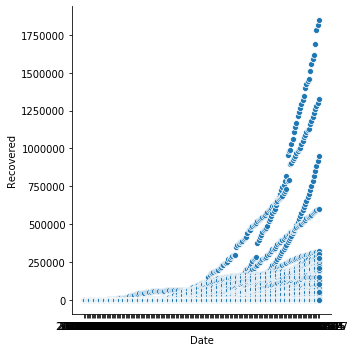

In [10]:
plt.figure(figsize=(400,6))
sns.relplot(x="Date",y="Recovered",data=covid_19_clean_complete)

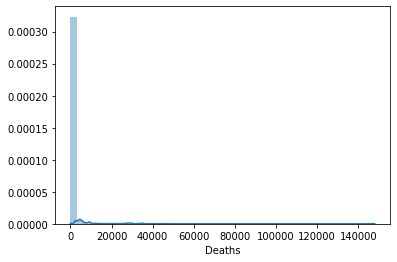

In [11]:
sns.distplot(covid_19_clean_complete.Deaths)

<Figure size 4320x36000 with 0 Axes>

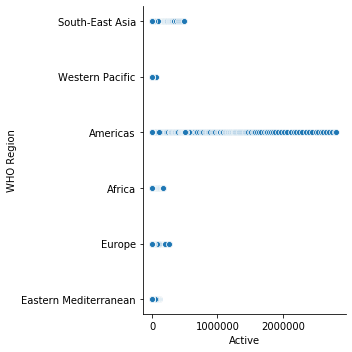

In [12]:
plt.figure(figsize=(60,500))
sns.relplot(x="Active",y="WHO Region",data=covid_19_clean_complete)
plt.show()

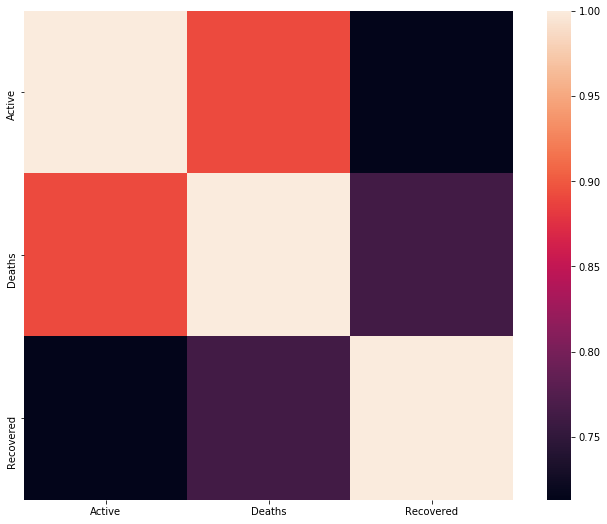

In [13]:
factors=['Active','Deaths','Recovered','WHO Region']
cormat=covid_19_clean_complete[factors].corr()
f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(cormat,square=True)

In [23]:
covid_19_clean_complete["Date"]=pd.to_datetime(covid_19_clean_complete["Date"])

# Grouping different types of cases as per the date

In [24]:
datewise = covid_19_clean_complete.groupby(["Date"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})

In [40]:
print("Basic information")
print("Total no. of confirmed cases around the world",datewise["Confirmed"].iloc[-1])
print("Total no. of recovered cases around the world",datewise["Recovered"].iloc[-1])
print("Total no. of deaths cases around the world",datewise["Deaths"].iloc[-1])
print("Total no. of active cases around the world",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]))
print("Total no. of closed cases around the world",(datewise["Confirmed"].iloc[-1]+datewise["Recovered"].iloc[-1]))

Basic information
Total no. of confirmed cases around the world 16480485
Total no. of recovered cases around the world 9468087
Total no. of deaths cases around the world 654036
Total no. of active cases around the world 7012398
Total no. of closed cases around the world 25948572


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

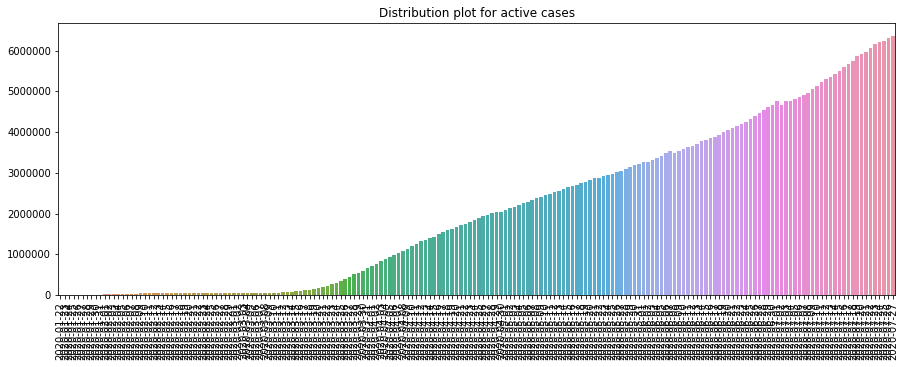

In [39]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
plt.title("Distribution plot for active cases")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Weekly Progress of different types of cases')

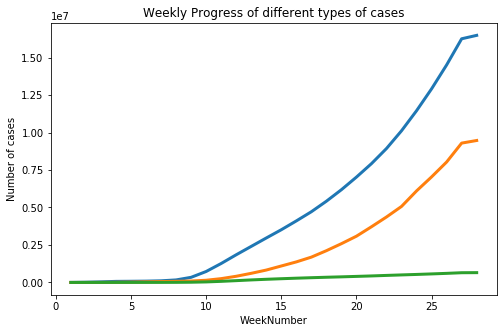

In [44]:
datewise["WeekofYear"]=datewise.index.weekofyear
week_num=[]
weekwise_confirmed=[]
weekwise_deaths=[]
weekwise_recovered=[]
w=1
for i in list(datewise["WeekofYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3)
plt.plot(week_num,weekwise_recovered,linewidth=3)
plt.plot(week_num,weekwise_deaths,linewidth=3)
plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases")

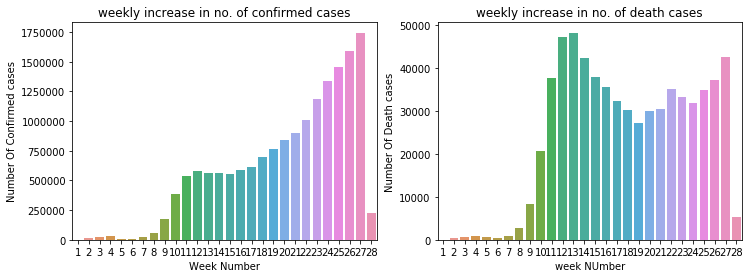

In [45]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,4))
sns.barplot(x=week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("week NUmber")
ax1.set_ylabel("Number Of Confirmed cases")
ax2.set_ylabel("Number Of Death cases")
ax1.set_title("weekly increase in no. of confirmed cases")
ax2.set_title("weekly increase in no. of death cases")
plt.show()


Average increase in number of confirmed cases everyday: Date
2020-01-22         0.0
2020-01-23        99.0
2020-01-24       287.0
2020-01-25       493.0
2020-01-26       684.0
                ...   
2020-07-23    282756.0
2020-07-24    281164.0
2020-07-25    255545.0
2020-07-26    204606.0
2020-07-27    228689.0
Name: Confirmed, Length: 188, dtype: float64
Average increase in number of recovered cases everyday: Date
2020-01-22         0.0
2020-01-23         2.0
2020-01-24         6.0
2020-01-25         3.0
2020-01-26        13.0
                ...   
2020-07-23    169714.0
2020-07-24    228736.0
2020-07-25    219038.0
2020-07-26    134721.0
2020-07-27    174623.0
Name: Recovered, Length: 188, dtype: float64
Average increase in number of deaths cases everyday: Date
2020-01-22       0.0
2020-01-23       1.0
2020-01-24       8.0
2020-01-25      16.0
2020-01-26      14.0
               ...  
2020-07-23    9966.0
2020-07-24    6144.0
2020-07-25    4867.0
2020-07-26    4104.0
2020-07-27    

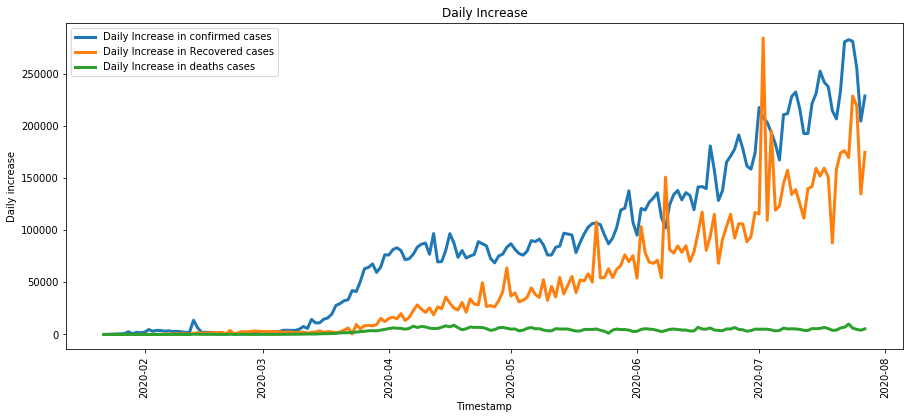

In [47]:
print("Average increase in number of confirmed cases everyday:",np.round(datewise["Confirmed"].diff().fillna(0)))
print("Average increase in number of recovered cases everyday:",np.round(datewise["Recovered"].diff().fillna(0)))
print("Average increase in number of deaths cases everyday:",np.round(datewise["Deaths"].diff().fillna(0)))

plt.figure(figsize=(15,6))
plt.plot(datewise["Confirmed"].diff().fillna(0),label="Daily Increase in confirmed cases",linewidth=3)
plt.plot(datewise["Recovered"].diff().fillna(0),label="Daily Increase in Recovered cases",linewidth=3)
plt.plot(datewise["Deaths"].diff().fillna(0),label="Daily Increase in deaths cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily increase")
plt.title("Daily Increase")
plt.legend()
plt.xticks(rotation=90)
plt.show()

# Country Wise analysis
Calculating Country Wise Mortality rate


In [49]:
countrywise=covid_19_clean_complete[covid_19_clean_complete["Date"]==covid_19_clean_complete["Date"].max()].groupby(["Country/Region"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum","Active":"sum"}).sort_values(["Confirmed"],ascending =False)


In [ ]:
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Confirmed"])*100
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Confirmed"])*100